In [19]:
try:
    import scapy.all as scapy
except ImportError:
    import scapy

try:
    # This import works from the project directory
    import scapy_http.http
except ImportError:
    # If you installed this package via pip, you just need to execute this
    from scapy.layers import http

read the pcap file

In [20]:
def get_http_payload(ether):
    return ether.payload.payload.payload.payload

def count_char(pcapFile):
    char_set = set()
    with scapy.PcapReader(pcapFile) as pcap_reader:
        for pkt in pcap_reader:
            http_payload = get_http_payload(pkt)
            http_payload.remove_payload()
            tmp = str(bytes(http_payload), encoding='utf-8')
            for c in tmp:
                char_set.add(c)
    print(char_set)
    print('共有字符个数：', len(char_set))
    return(char_set)

In [21]:
pcapFile_weibo = "../data/weibo_http_request.pcap"
pcapFile_zhihu = "../data/zhihu/zhihu_req.pcap"
# 统计微博http请求的字符
weibo_set = count_char(pcapFile_weibo)

{'i', 'B', 'j', '-', 'Y', 'P', '.', 'N', '8', 'n', 'T', '(', 'o', 'U', '_', '~', ':', 'E', 'R', 'b', 't', '&', 'e', '"', 'z', ';', '4', '2', 'k', 'l', '0', 's', ')', 'Q', '+', 'G', 'u', '=', '7', 'r', '?', '{', 'A', 'S', ' ', 'y', 'h', ',', 'C', 'M', '9', 'f', 'c', 'Z', '5', 'J', '6', 'W', 'X', '\n', 'v', 'd', '}', '1', 'F', 'w', 'p', 'D', 'K', 'g', 'L', 'q', '*', 'I', '3', 'V', '\r', '%', 'O', 'a', 'x', 'm', 'H', '/'}
共有字符个数： 84


In [22]:
# 统计知乎http请求的字符
zhihu_set = count_char(pcapFile_zhihu)

{'i', 'B', 'j', '-', 'Y', 'P', '.', 'N', '8', 'n', 'T', '(', 'o', 'U', '_', 'E', ':', 'R', 'b', 't', '&', 'e', 'z', ';', '4', '2', 'k', 'l', '0', 's', ')', 'Q', '+', 'G', 'u', '=', '7', '?', 'r', 'A', 'S', ' ', 'h', 'y', ',', 'C', 'M', '9', 'f', 'c', 'Z', '5', 'J', '6', 'W', 'X', '\n', 'v', 'd', '1', 'F', 'p', 'K', 'D', 'w', 'g', 'L', 'q', 'I', '3', 'V', '\r', '%', 'O', 'a', 'x', 'm', 'H', '/'}
共有字符个数： 79


In [23]:
for c in weibo_set:
    if c not in zhihu_set:
        print(c)

~
"
{
}
*


In [24]:
for c in zhihu_set:
    if c not in weibo_set:
        print(c)

In [25]:
# one hot encode
char2int = dict((c, i) for (i, c) in enumerate(weibo_set))
int2char = dict((i, c) for (i, c) in enumerate(weibo_set))

from numpy import argmax

def onehot_encode(data):
    """
        data: 需要编码的字符串
        return： 编码后的矩阵
    """
    integer_encoded = [char2int[char] for char in data] # 获得对data编码的list   
    onehot_encoded = list()
    for value in integer_encoded:
           letter = [0 for _ in range(len(weibo_set))]   # 生成一个全0的list
           letter[value] = 1
           onehot_encoded.append(letter)
    return onehot_encoded

In [26]:
print(onehot_encode('abc'))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [27]:
# 统计http头部长度
import numpy as np
def count_headerlen(pcapFile):
    header_lens = []
    i = 0
    with scapy.PcapReader(pcapFile) as pcap_reader:
        for pkt in pcap_reader:
            http_payload = get_http_payload(pkt)
            http_payload.remove_payload()
            tmp = str(bytes(http_payload), encoding='utf-8')
#             if i == 149:
#                 print(tmp)
            header_len = len(tmp)
            header_lens.append(header_len)
            i += 1
    print(max(header_lens))
    print(min(header_lens))
    print(np.mean(header_lens))
    
    return header_lens

In [28]:
a = count_headerlen(pcapFile_weibo)
len(a)

2207
151
385.371


1000

In [29]:
tmp = count_headerlen(pcapFile_zhihu)

817
121
227.215


817
121
227.215


(array([  1.,   0.,  10.,   0., 122.,   0.,   0., 825.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  14.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,  22.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([121.  , 134.92, 148.84, 162.76, 176.68, 190.6 , 204.52, 218.44,
        232.36, 246.28, 260.2 , 274.12, 288.04, 301.96, 315.88, 329.8 ,
        343.72, 357.64, 371.56, 385.48, 399.4 , 413.32, 427.24, 441.16,
        455.08, 469.  , 482.92, 496.84, 510.76, 524.68, 538.6 , 552.52,
        566.44, 580.36, 594.28, 608.2 , 622.12, 636.04, 649.96, 663.88,
        677.8 , 691.72, 705.64, 719.56, 733.48, 747.4 , 761.32, 775.24,
        789.16, 803.08, 817.  ]),
 <a list of 50 Patch objects>)

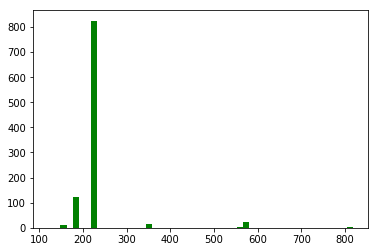

In [30]:
from matplotlib import pyplot as plt

plt.hist(count_headerlen(pcapFile_zhihu),bins=50,color='green')

2207
151
385.371


(array([  3.,   0.,  47., 481.,  29.,  13.,  51., 131., 144.,  75.,  12.,
          0.,   0.,   4.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 151.  ,  192.12,  233.24,  274.36,  315.48,  356.6 ,  397.72,
         438.84,  479.96,  521.08,  562.2 ,  603.32,  644.44,  685.56,
         726.68,  767.8 ,  808.92,  850.04,  891.16,  932.28,  973.4 ,
        1014.52, 1055.64, 1096.76, 1137.88, 1179.  , 1220.12, 1261.24,
        1302.36, 1343.48, 1384.6 , 1425.72, 1466.84, 1507.96, 1549.08,
        1590.2 , 1631.32, 1672.44, 1713.56, 1754.68, 1795.8 , 1836.92,
        1878.04, 1919.16, 1960.28, 2001.4 , 2042.52, 2083.64, 2124.76,
        2165.88, 2207.  ]),
 <a list of 50 Patch objects>)

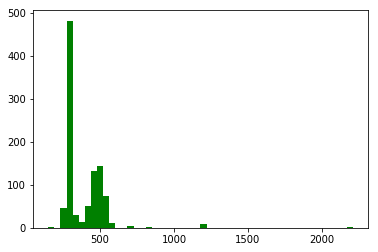

In [31]:
plt.hist(count_headerlen(pcapFile_weibo),bins=50,color='green')

In [32]:
#  with scapy.PcapReader(pcapFile_weibo) as pcap_reader:
#     for pkt in pcap_reader:
#         http_payload = get_http_payload(pkt)
#         http_payload.remove_payload()
#         http_payload.delfieldval('User-Agent')
#         print(http_payload.fields['Host'])
#         tmp = str(bytes(http_payload), encoding='utf-8')
#         print(tmp)
#         break

In [33]:
X_train = np.empty((1800, 230, 84))
with scapy.PcapReader(pcapFile_weibo) as pcap_reader:
    i = 0
    for pkt in pcap_reader:
        http_payload = get_http_payload(pkt)
        http_payload.remove_payload()
        tmp = str(bytes(http_payload), encoding='utf-8')
        # 不足230个字符的以空格填充
        tmp = tmp.ljust(230, ' ')
        # 取前230个字符
        tmp = tmp[:230]
        encoded = onehot_encode(tmp)
        np_encoded = np.array(encoded)
        X_train[i] = np_encoded
        i += 1
        if i == 900:
            break
print(i)
with scapy.PcapReader(pcapFile_zhihu) as pcap_reader:
    for pkt in pcap_reader:
        http_payload = get_http_payload(pkt)
        http_payload.remove_payload()
        tmp = str(bytes(http_payload), encoding='utf-8')
        # 不足230个字符的以空格填充
        tmp = tmp.ljust(230, ' ')
        # 取前230个字符
        tmp = tmp[:230]
        encoded = onehot_encode(tmp)
        np_encoded = np.array(encoded)
        X_train[i] = np_encoded
        i += 1
        if i == 1800:
            break
print(i)
print(X_train.shape)

# 保存到文件
np.save('X_train.npy', X_train)

900
1800
(1800, 230, 84)


In [34]:
X_test = np.empty((200, 230, 84))
with scapy.PcapReader(pcapFile_weibo) as pcap_reader:
    i = 0
    for pkt in pcap_reader:
        if i >= 900:
            http_payload = get_http_payload(pkt)
            http_payload.remove_payload()
            tmp = str(bytes(http_payload), encoding='utf-8')
            # 不足230个字符的以空格填充
            tmp = tmp.ljust(230, ' ')
            # 取前230个字符
            tmp = tmp[:230]
            encoded = onehot_encode(tmp)
            np_encoded = np.array(encoded)
            X_test[i-900] = np_encoded
        i += 1
print(i)
i = 0
with scapy.PcapReader(pcapFile_zhihu) as pcap_reader:
    for pkt in pcap_reader:
        if i >= 900:
            http_payload = get_http_payload(pkt)
            http_payload.remove_payload()
            tmp = str(bytes(http_payload), encoding='utf-8')
            # 不足230个字符的以空格填充
            tmp = tmp.ljust(230, ' ')
            # 取前230个字符
            tmp = tmp[:230]
            encoded = onehot_encode(tmp)
            np_encoded = np.array(encoded)
            X_test[i-900] = np_encoded
        i += 1
print(i)
print(X_test.shape)

# 保存到文件
np.save('X_test.npy', X_test)

1000
1000
(200, 230, 84)


In [35]:
y_train = np.zeros(1800)
y_train[900:] = np.ones(900)
print(len(y_train))
print(y_train[900])
np.save('y_train.npy', y_train)

1800
1.0


In [36]:
y_test = np.zeros(200)
y_test[100:] = np.ones(100)
print(len(y_test))
print(y_test[100])
np.save('y_test.npy', y_test)

200
1.0


In [37]:
y_train = np.load('y_train.npy')
print(y_train[900])
print(type(y_train))

1.0
<class 'numpy.ndarray'>
